In [84]:
#Mount my google drive
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd


def getYoutuber(popular, fileName):
  if(popular == 0):
    review_data = load_files(r"drive/My Drive/BIGDATA_data/youtube_subtitle/data_sk/popular/" + fileName)
  elif(popular == 1):
    review_data = load_files(r"drive/My Drive/BIGDATA_data/youtube_subtitle/data_sk/unpopular/" + fileName)

  X = review_data.data

  documents = []

  stemmer = WordNetLemmatizer()

  for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

  wordList = []
  for i in range(len(documents)):
    wordList = wordList + documents[i].split()
  
  wordDict = Counter(wordList)

  return wordDict, np.array(wordList)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
popular_list = ['Austin Evans', 'Dave Lee', 'JerryRigEverything', 'Linus Tech Tips', 'Marques Brownlee', 'PhoneArena', 'Techquickie', 'TechSmartt', 'The Verge', 'UrAvgConsumer']
unpopular_list = ['Detroit Tech', 'Digital David', 'JoltReviews', 'Mobile WizTech', 'Richard Tech', 'Tech Dive', 'Tech Square', 'Tyion Official', 'WetIce', 'Zachary Livingston']

In [87]:
pop_dict = []
pop_list = []
for i in range(len(popular_list)):
  temp_pop_dict, temp_pop_list = getYoutuber(0, popular_list[i])
  pop_dict.append(temp_pop_dict)
  pop_list.append(temp_pop_list)

unpop_dict = []
unpop_list = []
for i in range(len(unpopular_list)):
  temp_unpop_dict, temp_unpop_list = getYoutuber(1, unpopular_list[i])
  unpop_dict.append(temp_unpop_dict)
  unpop_list.append(temp_unpop_list)

In [88]:
pop_df = []
for i in range(len(pop_list)):
  pop_df.append(pd.DataFrame(pop_list[i]))

unpop_df = []
for i in range(len(unpop_list)):
  unpop_df.append(pd.DataFrame(unpop_list[i]))

In [89]:
pop_sen = []
unpop_sen = []

for i in range(len(pop_list)):
  all_text = " ".join(pop_list[i])
  pop_sen.append(all_text)

for i in range(len(pop_list)):
  all_text = " ".join(unpop_list[i])
  unpop_sen.append(all_text)

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [24, 9]
wc = WordCloud(stopwords=text.ENGLISH_STOP_WORDS, background_color="white", colormap="Dark2",width=1000,height=1000,
                max_words=20, random_state=42)

for i in range(len(pop_sen)):
    wc.generate(pop_sen[i])
    
    plt.subplot(2, 5, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(popular_list[i])
    
plt.show()

In [91]:
plt.rcParams['figure.figsize'] = [24, 9]
wc = WordCloud(stopwords=text.ENGLISH_STOP_WORDS, background_color="white", colormap="Dark2",width=1000,height=1000,
                max_words=20, random_state=42)

for i in range(len(unpop_sen)):
    wc.generate(unpop_sen[i])
    
    plt.subplot(2, 5, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(unpopular_list[i])
    
plt.show()

In [92]:
add_stopword = frozenset(['just', 'like', 'xe2', 'x80', 'x99t', 'x90'])



plt.rcParams['figure.figsize'] = [24, 9]
wc = WordCloud(stopwords=text.ENGLISH_STOP_WORDS.union(add_stopword), background_color="white", colormap="Dark2",width=1000,height=1000,
                max_words=20, random_state=42)

for i in range(len(pop_sen)):
    wc.generate(pop_sen[i])
    
    plt.subplot(2, 5, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(popular_list[i])
    
plt.show()

In [93]:
plt.rcParams['figure.figsize'] = [24, 9]
wc = WordCloud(stopwords=text.ENGLISH_STOP_WORDS.union(add_stopword), background_color="white", colormap="Dark2",width=1000,height=1000,
                max_words=20, random_state=42)

for i in range(len(unpop_sen)):
    wc.generate(unpop_sen[i])
    
    plt.subplot(2, 5, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(unpopular_list[i])
    
plt.show()

In [94]:
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

pop_blob = []
unpop_blob = []

for i in range(len(pop_sen)):
  pop_blob.append(TextBlob(pop_sen[i]))
  unpop_blob.append(TextBlob(unpop_sen[i]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [95]:
print("Popular Youtuber Text Blob result")
print()
for i in range(len(pop_blob)):
  print(popular_list[i] + " Text Blob result")
  print(pop_blob[i].sentiment)

Popular Youtuber Text Blob result

Austin Evans Text Blob result
Sentiment(polarity=0.1448708195828919, subjectivity=0.5085074789893175)
Dave Lee Text Blob result
Sentiment(polarity=0.1885253115315221, subjectivity=0.5159562942605518)
JerryRigEverything Text Blob result
Sentiment(polarity=0.12650165378421135, subjectivity=0.4779781793346194)
Linus Tech Tips Text Blob result
Sentiment(polarity=0.1434846988539463, subjectivity=0.5098879959405663)
Marques Brownlee Text Blob result
Sentiment(polarity=0.1649843865510918, subjectivity=0.48911892429292253)
PhoneArena Text Blob result
Sentiment(polarity=0.16055565513361672, subjectivity=0.4879314817633384)
Techquickie Text Blob result
Sentiment(polarity=0.12070480269727543, subjectivity=0.4757421506020775)
TechSmartt Text Blob result
Sentiment(polarity=0.15764940533317953, subjectivity=0.5082280473604317)
The Verge Text Blob result
Sentiment(polarity=0.137869569061627, subjectivity=0.4907385599455053)
UrAvgConsumer Text Blob result
Sentiment(p

In [96]:
print("Unpopular Youtuber Text Blob result")
print()
for i in range(len(unpop_blob)):
  print(unpopular_list[i] + " Text Blob result")
  print(unpop_blob[i].sentiment)

Unpopular Youtuber Text Blob result

Detroit Tech Text Blob result
Sentiment(polarity=0.14800616271015518, subjectivity=0.5083048300743588)
Digital David Text Blob result
Sentiment(polarity=0.20075386827217737, subjectivity=0.4707673830401244)
JoltReviews Text Blob result
Sentiment(polarity=0.16923512846334796, subjectivity=0.5360496117205426)
Mobile WizTech Text Blob result
Sentiment(polarity=0.19980183810310345, subjectivity=0.49662196755439)
Richard Tech Text Blob result
Sentiment(polarity=0.15392275178879553, subjectivity=0.5025505034028094)
Tech Dive Text Blob result
Sentiment(polarity=0.16044784774498877, subjectivity=0.493653668579615)
Tech Square Text Blob result
Sentiment(polarity=0.16855421525029407, subjectivity=0.4792208586623251)
Tyion Official Text Blob result
Sentiment(polarity=0.12173754097482867, subjectivity=0.45273559379491773)
WetIce Text Blob result
Sentiment(polarity=0.1570794789462929, subjectivity=0.45112291664933396)
Zachary Livingston Text Blob result
Sentimen

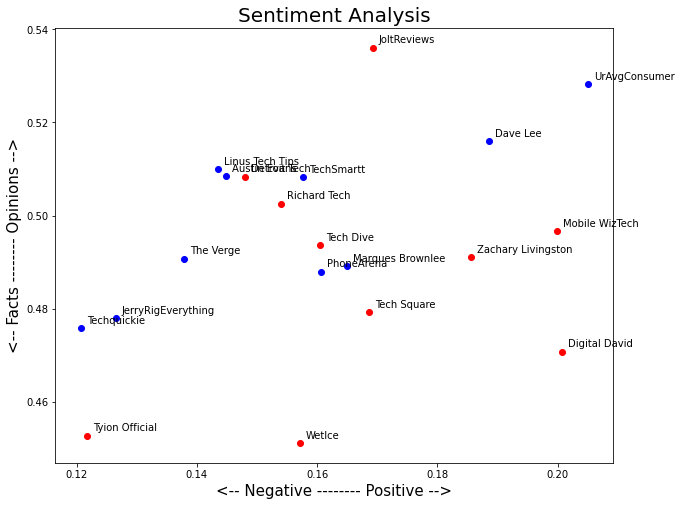

In [97]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for i in range(len(pop_blob)):
    pop_x = pop_blob[i].sentiment.polarity
    pop_y = pop_blob[i].sentiment.subjectivity
    plt.scatter(pop_x, pop_y, color='blue')
    plt.text(pop_x+.001, pop_y+.001, popular_list[i], fontsize=10)

    unpop_x = unpop_blob[i].sentiment.polarity
    unpop_y = unpop_blob[i].sentiment.subjectivity
    plt.scatter(unpop_x, unpop_y, color='red')
    plt.text(unpop_x+.001, unpop_y+.001, unpopular_list[i], fontsize=10)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [132]:
#initialize variables
theta0 = 10
theta1 = 1
m = 10

x = []
y = []

for i in range(len(pop_blob)):
  x.append(pop_blob[i].sentiment.polarity)
  y.append(pop_blob[i].sentiment.subjectivity)

x = np.array(x)
y = np.array(y)



In [143]:
x_neg = []
y_neg = []

for i in range(len(pop_blob)):
  x_neg.append(unpop_blob[i].sentiment.polarity)
  y_neg.append(unpop_blob[i].sentiment.subjectivity)

x_neg = np.array(x_neg)
y_neg = np.array(y_neg)

In [133]:
#Define linear function & cost function & derivative function of cost function
def hTheta():
  return theta1*x + theta0

def j():
  return (np.sum((hTheta() - y)**2)/(2*m))

def jPrimeTheta0():
  return (np.sum(hTheta() - y))/m

def jPrimeTheta1():
  return (np.sum((hTheta() -y)*x))/m



In [134]:
#Define update function

learningRate = 0.001

def updateTheta():
  updateTheta0 = theta0 - (learningRate*jPrimeTheta0())
  updateTheta1 = theta1 - (learningRate*jPrimeTheta1())

  return updateTheta0, updateTheta1

In [135]:
#Learning
while(1):
  tempTheta0 = theta0
  tempTheta1 = theta1
  theta0, theta1 = updateTheta()
  if (tempTheta0 == theta0) and (tempTheta1 == theta1):
    break

In [148]:
#Visualize
for i in range(len(popular_list)):
  plt.scatter(x[i], y[i], color=[0, 0, 1])
  plt.text(x[i]+.001, y[i]+.001, popular_list[i], fontsize=10)

plt.plot(x, hTheta(), color=[0, 1, 0])
plt.title('Before Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [147]:
#Visualize
for i in range(len(unpopular_list)):
  plt.scatter(x_neg[i], y_neg[i], color=[1, 0, 0])
  plt.text(x_neg[i]+.001, y_neg[i]+.001, unpopular_list[i], fontsize=10)

plt.plot(x, hTheta(), color=[0, 1, 0])

plt.title('Before Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()